In [1]:
import json
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
from bookdbtool.repl_tools import *
from bookdbtool.visualizations import running_total_comparison, yearly_comparisons

bc = BC_Tool()

In [3]:
target_year = "2022"
bc.summary_books_read_by_year(target_year)

|-----|----------|----------|
|year |pages read|books read|
|===========================|
|2022 |4008.0    |11        |
|-----|----------|----------|



In [4]:
bc.MINIMAL_BOOK_INDEXES = [1,2,7,13]
bc.books_read_by_year(target_year)
dfl = bc.result

|---------------------------------------------------------------------------------------|-----------------------|-----|----------|
|Title                                                                                  |Author                 |Pages|ReadDate  |
|================================================================================================================================|
|The Code Breaker: Jennifer Doudna, Gene Editing, and the Future of the Human Race      |Isaacson, Walter       |500  |2022-01-06|
|---------------------------------------------------------------------------------------|-----------------------|-----|----------|
|Godel, Escher, Bach                                                                    |Hofstadter, Douglas R  |776  |2022-01-19|
|---------------------------------------------------------------------------------------|-----------------------|-----|----------|
|Turn the Ship Around!: A True Story of Turning Followers into Leaders             

In [5]:
dfl[["Pages"]].describe().style

,Pages
count,11
mean,364.364
std,169.853
min,165
25%,272
50%,305
75%,433
max,776


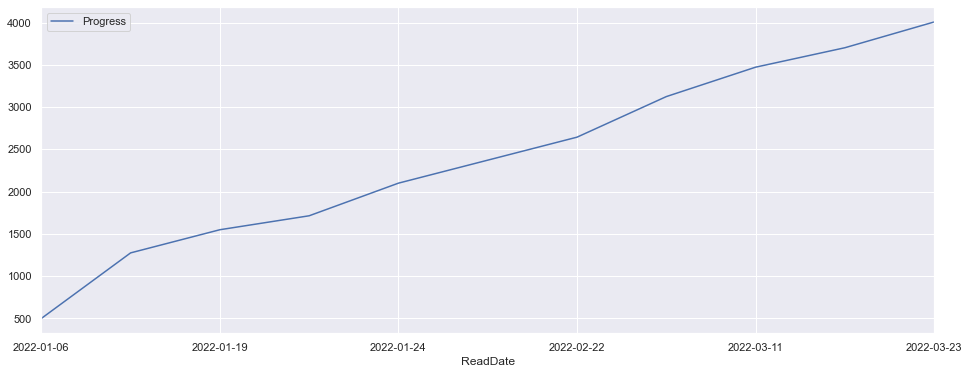

In [6]:
plot_size = [16,6]
dfl["Progress"] = dfl["Pages"].cumsum()
dfl.plot("ReadDate", "Progress", figsize=plot_size)

In [7]:
bc.summary_books_read_by_year()
df = bc.result
df["rank"] = df["pages read"].rank(ascending=False)
df.sort_values(by=["rank"], inplace=True)
df.reset_index()

|-----|----------|----------|
|year |pages read|books read|
|===========================|
|1966 |4409.0    |21        |
|-----|----------|----------|
|1984 |1508.0    |9         |
|-----|----------|----------|
|1985 |2200.0    |11        |
|-----|----------|----------|
|1986 |3325.0    |14        |
|-----|----------|----------|
|1987 |3660.0    |15        |
|-----|----------|----------|
|1988 |4535.0    |20        |
|-----|----------|----------|
|1989 |5262.0    |22        |
|-----|----------|----------|
|1990 |2730.0    |13        |
|-----|----------|----------|
|1991 |4281.0    |16        |
|-----|----------|----------|
|1992 |2235.0    |7         |
|-----|----------|----------|
|1993 |4706.0    |15        |
|-----|----------|----------|
|1994 |4760.0    |16        |
|-----|----------|----------|
|1995 |4908.0    |21        |
|-----|----------|----------|
|1996 |5175.0    |19        |
|-----|----------|----------|
|1997 |2022.0    |9         |
|-----|----------|----------|
|1998 |588

,index,year,pages read,books read,rank
0,36,2019,12059.0,36,1.0
1,27,2010,11712.0,43,2.0
2,22,2005,10117.0,38,3.0
3,37,2020,9570.0,30,4.0
4,20,2003,9430.0,40,5.0
5,24,2007,9099.0,33,6.0
6,26,2009,8680.0,33,7.0
7,38,2021,8427.0,24,8.0
8,25,2008,8153.0,33,9.0
9,28,2011,7583.0,25,10.0


In [8]:
df.style

,year,pages read,books read,rank
36,2019,12059,36,1
27,2010,11712,43,2
22,2005,10117,38,3
37,2020,9570,30,4
20,2003,9430,40,5
24,2007,9099,33,6
26,2009,8680,33,7
38,2021,8427,24,8
25,2008,8153,33,9
28,2011,7583,25,10


In [9]:
df[["books read", "pages read"]].describe().style

,books read,pages read
count,40,40
mean,21.925,5980.8
std,8.96256,2556.88
min,7,1508
25%,15.75,4393
50%,21,5487
75%,27,7469
max,43,12059


In [10]:
now = df.loc[df.year == int(target_year)]
print(now)

    year  pages read  books read  rank
39  2022      4008.0          11  33.0


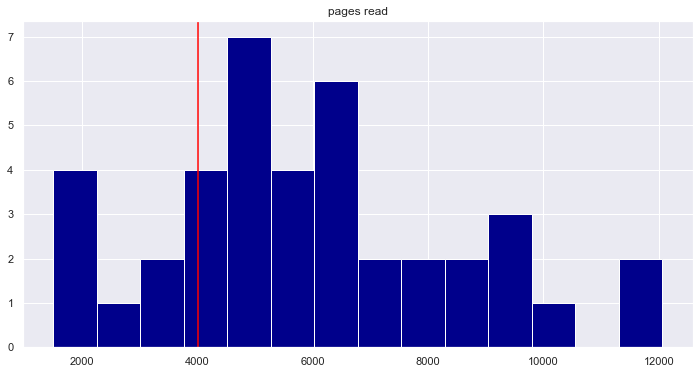

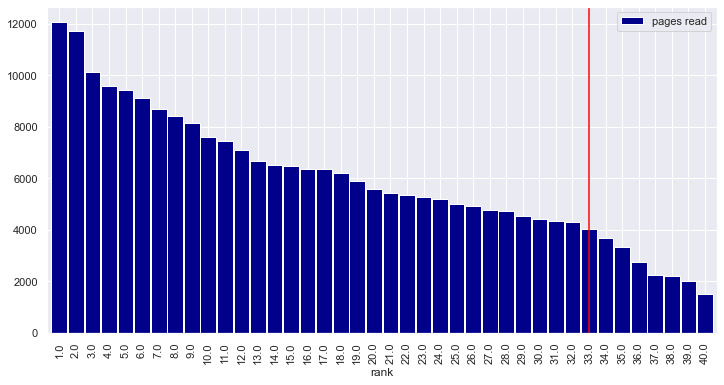

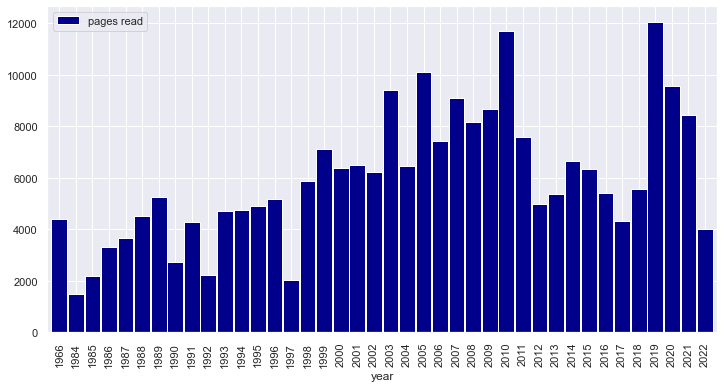

In [11]:
yearly_comparisons(df, int(target_year))

In [12]:
bc.books_read_by_year()
df = bc.result

|------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|-----|----------|
|Title                                                                                                                               |Author                                                       |Pages|ReadDate  |
|===================================================================================================================================================================================================================|
|King's Equal, The                                                                                                                   |Paterson, Katherine ill. Vagin, Vladimir                     |64   |1966-05-25|
|------------------------------------------------------------------------------------------------------------------------------------|----------

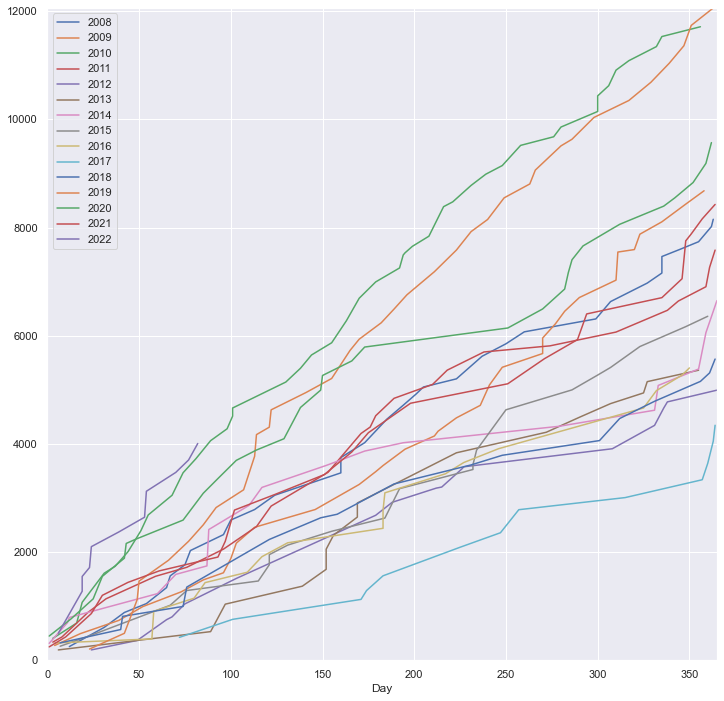

In [13]:
running_total_comparison(df, window=15)